Plots: ImagingPlotter
=====================

This example illustrates how to plot an `Imaging` dataset using an `ImagingPlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets load example imaging of of a strong lens as an `Imaging` object.

In [2]:
dataset_name = "mass_sie__source_sersic"
dataset_path = path.join("dataset", "imaging", "no_lens_light", dataset_name)

imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "image.fits"),
    psf_path=path.join(dataset_path, "psf.fits"),
    noise_map_path=path.join(dataset_path, "noise_map.fits"),
    pixel_scales=0.1,
)

We now pass the imaging to an `ImagingPlotter` and call various `figure_*` methods to plot different attributes.

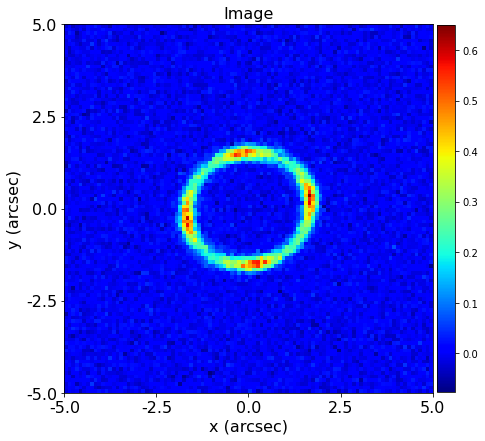

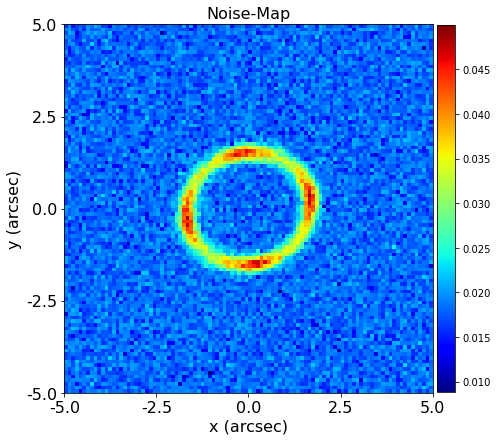

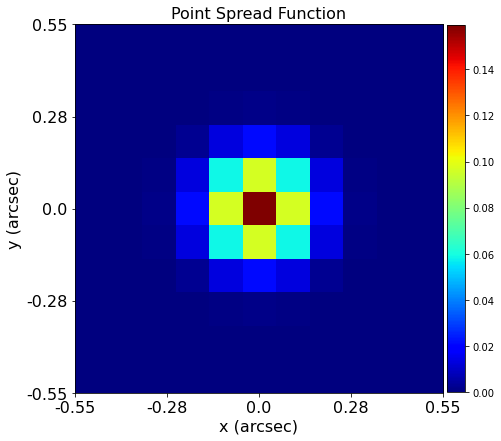

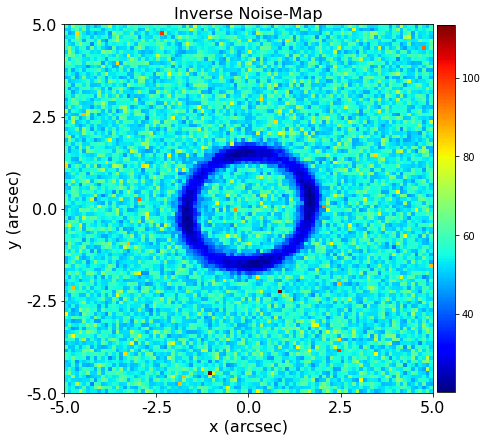

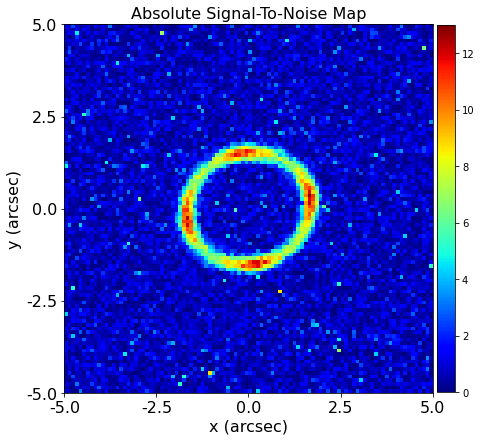

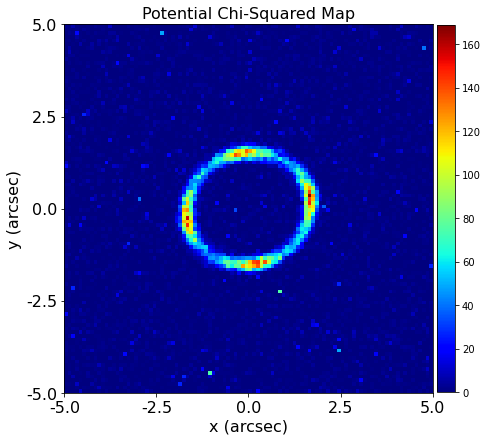

In [3]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(
    image=True,
    noise_map=True,
    psf=True,
    inverse_noise_map=True,
    potential_chi_squared_map=True,
    absolute_signal_to_noise_map=True,
)

The `ImagingPlotter` may also plot a subplot of all of these attributes.

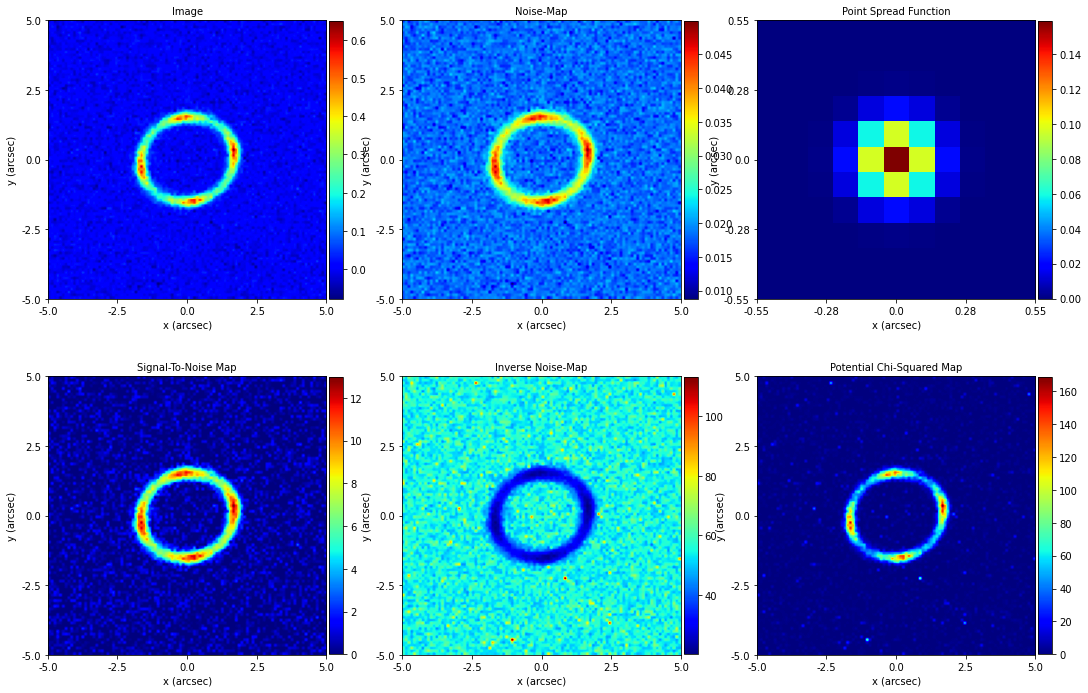

In [4]:
imaging_plotter.subplot_imaging()

Imaging` contains the following attributes which can be plotted automatically via the `Include2D` object.

(By default, an `Array2D` does not contain a `Mask2D`, we therefore manually created an `Array2D` with a mask to illustrate
the plotted of a mask and its border below).

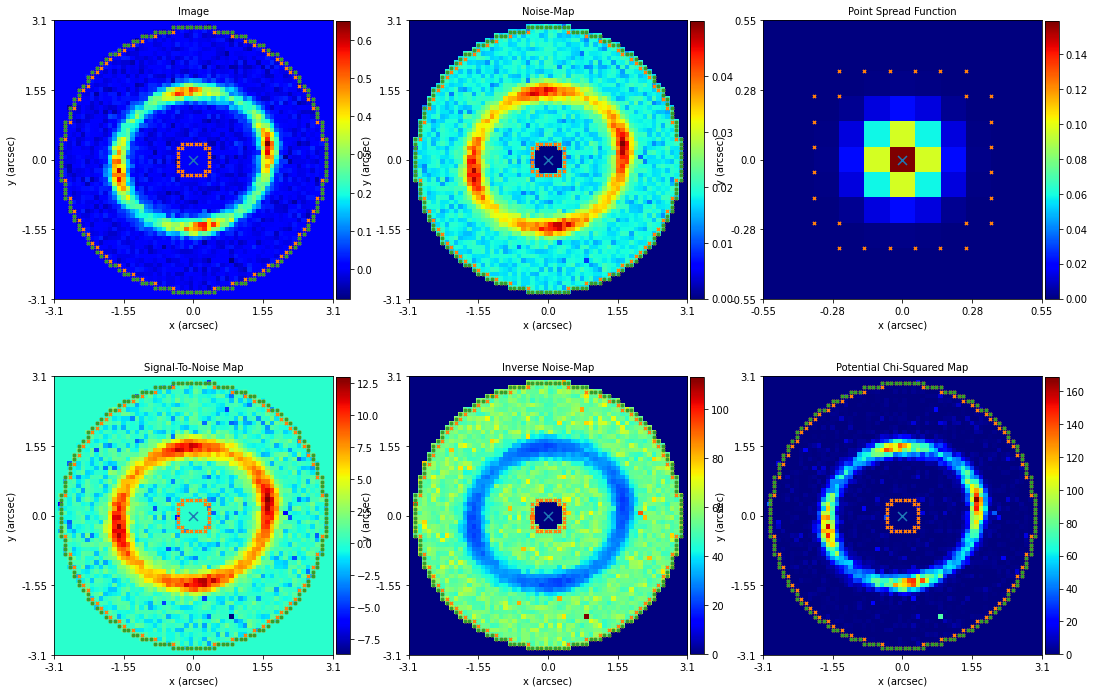

In [5]:
mask = al.Mask2D.circular_annular(
    shape_native=imaging.shape_native,
    pixel_scales=imaging.pixel_scales,
    sub_size=1,
    inner_radius=0.3,
    outer_radius=3.0,
)
masked_imaging = al.MaskedImaging(
    imaging=imaging, mask=mask, settings=al.SettingsMaskedImaging(sub_size=2)
)

include_2d = aplt.Include2D(origin=True, mask=True, border=True)
imaging_plotter = aplt.ImagingPlotter(imaging=masked_imaging, include_2d=include_2d)
imaging_plotter.subplot_imaging()

Finish.